# Exercise 5

In [1]:
import numpy as np
import scipy.io as sio
from scipy.optimize import fmin_cg, fmin_ncg
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# ==========

### Load and visualize data

In [2]:
data = sio.loadmat('ex5data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [3]:
X, y, Xtest, ytest, Xval, yval = [data[key] for 
                                  key in list(data.keys())[3:]]

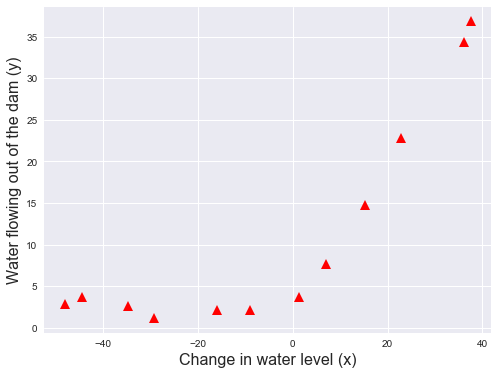

In [4]:
plt.figure(figsize=(8,6))
plt.plot(X, y, 'r^', markersize=10, linewidth=1.5)
plt.xlabel('Change in water level (x)', fontsize=16)
plt.ylabel('Water flowing out of the dam (y)', fontsize=16)
plt.show()

### Regularized Linear Regression Cost

In [5]:
def linearRegCostFunction(X, y, theta, lmd):
    '''Compute cost and gradient for regularized linear 
       regression with multiple variables'''
    theta = np.array(theta).reshape(-1, 1)
    m = len(y)
    grad = np.zeros(theta.shape)
    J = (X @ theta - y).T @ (X @ theta - y) / m / 2 + \
        lmd * (theta[1:]**2).sum() / m / 2
    grad[0] = X[:, 0].T @ (X @ theta - y) / m
    grad[1:] = X[:, 1:].T @ (X @ theta - y) /m + lmd * theta[1:] / m
    return J.flatten()[0], grad.flatten()

In [6]:
theta = [1, 1]
lmd = 1
J, grad = linearRegCostFunction(np.c_[np.ones((len(y), 1)), X], y, theta, lmd)

print('Cost at theta = [1, 1]: \n', J)
print('\nGradient at theta = [1, 1]: \n', grad)

Cost at theta = [1, 1]: 
 303.9931922202643

Gradient at theta = [1, 1]: 
 [-15.30301567 598.25074417]


### Train Linear Regression

In [7]:
def trainLinearReg(X, y, lmd):
    '''Trains linear regression given a dataset (X, y) and a
       regularization parameter lambda'''
    initial_theta = np.zeros((X.shape[1], 1))
    def costFunction(t):
        return linearRegCostFunction(X, y, t, lmd)[0]
    def gradientFunction(t):
        return linearRegCostFunction(X, y, t, lmd)[1]
    return fmin_cg(costFunction, initial_theta, gradientFunction, maxiter=200)

In [8]:
lmd = 0
theta = trainLinearReg(np.c_[np.ones((len(X), 1)), X], y, lmd)

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5


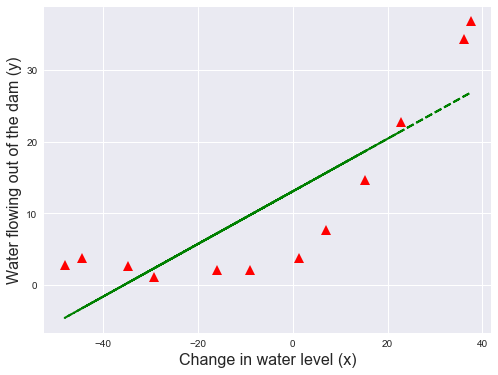

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(X, y, 'r^', markersize=10, linewidth=1.5)
plt.xlabel('Change in water level (x)', fontsize=16)
plt.ylabel('Water flowing out of the dam (y)', fontsize=16)
plt.plot(X, np.c_[np.ones((len(y), 1)), X] @ theta, 
         '--', color='green', linewidth=2)
plt.show()

# ==========

### Learning Curve

In [10]:
def learningCurve(X, y, Xval, yval, lmd):
    '''Generate the train and corss validation set errors needed
       to plot a learning curve'''
    m = X.shape[0]
    error_train = np.zeros((m, 1))
    error_val = np.zeros((m, 1))
    
    for i in range(m):
        theta = trainLinearReg(X[:i+1, :], y[:i+1], lmd)
        error_train[i] = linearRegCostFunction(X[:i+1, :], y[:i+1], theta, 0)[0]
        error_val[i] = linearRegCostFunction(Xval, yval, theta, 0)[0]
    return error_train.flatten(), error_val.flatten()

In [11]:
lmd = 0
error_train, error_val = learningCurve(np.c_[np.ones((len(X), 1)), X], y, 
                                       np.c_[np.ones((len(Xval), 1)), Xval],
                                       yval, lmd)
                                       

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 22
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 22
         Function evaluations: 34
        

### Plot the learning curves

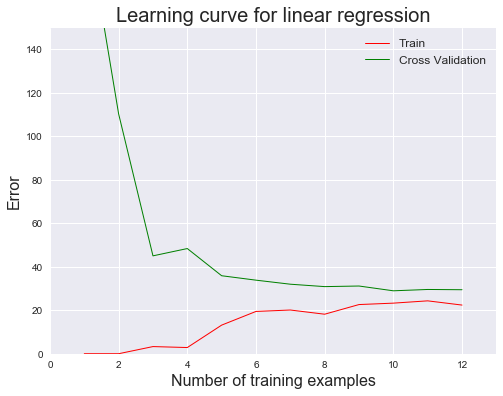

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(X)+1), error_train, 'r',
         range(1, len(X)+1), error_val, 'g', linewidth=1)
plt.xlabel('Number of training examples', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.legend(['Train', 'Cross Validation'], fontsize=12)
plt.title('Learning curve for linear regression', fontsize=20)
plt.axis([0, 13, 0, 150])
plt.show()

### Pretty print the errors

In [13]:
print('# Training Examples\tTrain Error\t\t\tCross Validation Error\n')
for i in range(len(X)):
    print('  \t{}\t\t{}\t\t{}\n'.format(i + 1, error_train[i], error_val[i]))

# Training Examples	Train Error			Cross Validation Error

  	1		3.944304526105059e-31		205.12109574547353

  	2		2.8596207814261678e-30		110.30036610764685

  	3		3.2865950455018744		45.01023181030184

  	4		2.8426776893998005		48.368911369819756

  	5		13.154048809153675		35.865141124323856

  	6		19.44396251250657		33.82995682018801

  	7		20.098521655093723		31.970986784828423

  	8		18.172858695200027		30.86244632377982

  	9		22.60940542495473		31.135997955024862

  	10		23.261461592611816		28.936207468250153

  	11		24.31724958804416		29.55143162199796

  	12		22.373906495108912		29.433818129942654



# ==========

### Polynomial Regression

In [14]:
def polyFeatures(X, p):
    '''Maps X (1D vector) into the p-th power'''
    X_poly = np.zeros((len(X.flatten()), p))
    for i in range(1, p + 1):
        X_poly[:, i - 1] = (X ** i).reshape(-1)
    return X_poly

def featureNormalize(X):
    '''Normalizes the features in X'''
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

### Prep polynomial features for training set, test set and cross validation set

In [15]:
p = 8

X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly)
X_poly = np.c_[np.ones((len(X_poly), 1)), X_poly]

X_poly_test = polyFeatures(Xtest, p)
X_poly_test = (X_poly_test - mu) / sigma
X_poly_test = np.c_[np.ones((len(X_poly_test), 1)), X_poly_test]

X_poly_val = polyFeatures(Xval, p)
X_poly_val = (X_poly_val - mu) / sigma
X_poly_val = np.c_[np.ones((len(X_poly_val), 1)), X_poly_val]
                       
print('Normalized Training Example 1:\n', X_poly[0, :])

Normalized Training Example 1:
 [ 1.         -0.36214078 -0.75508669  0.18222588 -0.70618991  0.30661792
 -0.59087767  0.3445158  -0.50848117]


In [16]:
lmd = 3
theta = trainLinearReg(X_poly, y, lmd)

Optimization terminated successfully.
         Current function value: 15.867688
         Iterations: 27
         Function evaluations: 47
         Gradient evaluations: 47


### Generate a new set to plot the polynomial curve

In [17]:
X1 = np.arange(-60, 65)
X1 = polyFeatures(X1, 8)
X1 = (X1 - mu) / sigma
X1 = np.c_[np.ones((len(X1), 1)), X1]
y1 = X1 @ theta

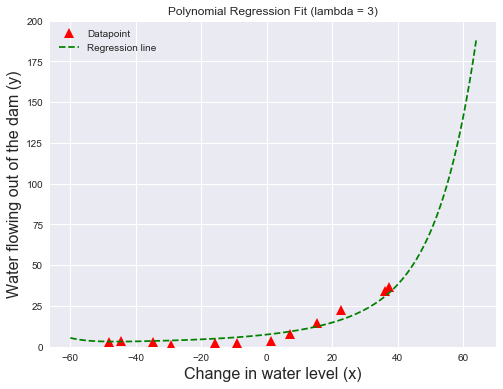

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(X, y, 'r^', markersize=10, markeredgewidth=0)
plt.plot(np.arange(-60, 65), y1, 'g--')
plt.xlabel('Change in water level (x)', fontsize=16)
plt.ylabel('Water flowing out of the dam (y)', fontsize=16)
plt.ylim(0, 200)
plt.legend(['Datapoint', 'Regression line'])
plt.title('Polynomial Regression Fit (lambda = %d)'%lmd)
plt.show()


### Plot learning curves

In [19]:
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, lmd)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.096527
         Iterations: 11
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 42.276062
         Iterations: 4
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 36.339042
         Iterations: 12
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 29.096616
         Iterations: 22
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 25.786542
         Iterations: 15
         Function evaluations: 27

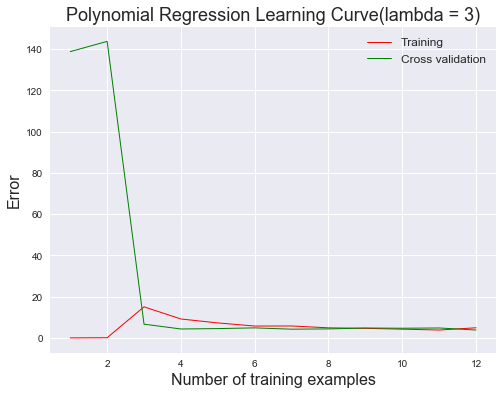

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(X_poly)+1), error_train, 'r',
         range(1, len(X_poly)+1), error_val, 'g', linewidth=1)
plt.xlabel('Number of training examples', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.legend(['Training', 'Cross validation'], fontsize=12)
plt.title('Polynomial Regression Learning Curve(lambda = {})'.format(lmd), fontsize=18)
plt.show()

### Pretty print errors

In [21]:
print('# Training Examples\tTrain Error\t\t\tCross Validation Error\n')
for i in range(len(X)):
    print('  \t{}\t\t{}\t\t{}\n'.format(i + 1, error_train[i], error_val[i]))

# Training Examples	Train Error			Cross Validation Error

  	1		3.183497063088152e-11		138.84692106366057

  	2		0.08070469561512739		143.80834025766913

  	3		15.062824139276316		6.660729969521069

  	4		9.168035371938023		4.3225087371819235

  	5		7.2657633765046015		4.511018261940552

  	6		5.74844247112675		4.861817223618457

  	7		5.782665903292638		4.230103139882313

  	8		4.879502795433633		4.360611345595228

  	9		4.641367259190507		4.79284824235049

  	10		4.232234460620056		4.684228003577599

  	11		3.8205330064425875		4.807679021054044

  	12		4.901347552865911		3.822898670236738



### Validation for Selecting Lambda

In [22]:
def validationCurve(X, y, Xval, yval):
    '''Generate the train and validation errors needed to
       plot a validation curve that we can use to select lambda'''
    lmd_vec = [0, .001, .003, .01, .03, .1, .3, 1, 3, 10]
    error_train = np.zeros((len(lmd_vec), 1))
    error_val = np.zeros((len(lmd_vec), 1))
    for i in range(len(lmd_vec)):
        theta = trainLinearReg(X, y, lmd_vec[i])
        error_train[i] = linearRegCostFunction(X, y, theta, 0)[0]
        error_val[i] = linearRegCostFunction(Xval, yval, theta, 0)[0]
    return lmd_vec, error_train.flatten(), error_val.flatten()

In [23]:
lmd_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)

         Current function value: 0.073874
         Iterations: 200
         Function evaluations: 372
         Gradient evaluations: 372
         Current function value: 0.177575
         Iterations: 200
         Function evaluations: 388
         Gradient evaluations: 388
         Current function value: 0.249948
         Iterations: 200
         Function evaluations: 392
         Gradient evaluations: 392
Optimization terminated successfully.
         Current function value: 0.385063
         Iterations: 122
         Function evaluations: 246
         Gradient evaluations: 246
Optimization terminated successfully.
         Current function value: 0.669275
         Iterations: 95
         Function evaluations: 177
         Gradient evaluations: 177
Optimization terminated successfully.
         Current function value: 1.443470
         Iterations: 63
         Function evaluations: 116
         Gradient evaluations: 116
Optimization terminated successfully.
         Current function va

### Plot learning curves

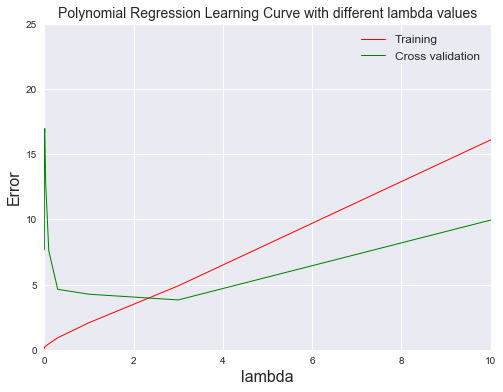

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(lmd_vec, error_train, 'r',
         lmd_vec, error_val, 'g', linewidth=1)
plt.xlabel('lambda', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.ylim(0, 25)
plt.xlim(0, 10)
plt.legend(['Training', 'Cross validation'], fontsize=12)
plt.title('Polynomial Regression Learning Curve with different lambda values', fontsize=14)
plt.show()

### Pretty print errors

In [25]:
print('# Training Examples\tTrain Error\t\t\tCross Validation Error\n')
for i in range(len(lmd_vec)):
    print('  \t{}\t\t{}\t\t{}\n'.format(lmd_vec[i], error_train[i], error_val[i]))

# Training Examples	Train Error			Cross Validation Error

  	0		0.07387404755699391		7.672425641592363

  	0.001		0.1281852894524925		12.52957871085724

  	0.003		0.17204061312216457		16.49825616442402

  	0.01		0.2214946914732101		16.951010194197927

  	0.03		0.2818563729745312		12.82540659000492

  	0.1		0.45932115429355563		7.587059977931217

  	0.3		0.9217746602158758		4.6368110441141885

  	1		2.0761882712615223		4.260631688713751

  	3		4.901347552865911		3.822898670236738

  	10		16.092209984844697		9.945503645775315

